<a href="https://colab.research.google.com/github/Ankitarora2/Comprehensive-News-Analysis/blob/main/Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market Trends: Green Hydrogen Focus**

**To run Selenium on Colab**

In [ ]:
# Set up for running selenium in Google Colab
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,399 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [668 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,064 kB]
Hit:13 https://

**Setting up WebDriver**

In [ ]:
!pip install chromedriver-autoinstaller

!pip install chromedriver_autoinstaller
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/121/chromedriver'

**PART1**

CNBC Website

The code dynamically adjusts the XPath if the current XPath is not found.

Addition: Remove None rows

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium import webdriver

# Set up Chrome webdriver
driver = webdriver.Chrome(options=chrome_options)

url = "https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Scroll to the bottom of the page
for _ in range(10):  # Adjust the number of scrolls as needed
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

Titles = []
Dates = []
Source = []


number= 450 #NUMBER OF HEADLINES REQUIRED

# Get titles, dates, and authors
for i in range(1, number):  # Adjust the range as needed
    title_link = f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/div[2]/a/span'
    date_link = f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/span/span[2]'
    pub_link = f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/span/span[1]/a'

    try:

        title_element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, title_link)))
        title = title_element.text
    except Exception as e:
        #print(f'Error retrieving title for item {i}: {e}') #UNCOMMENT THIS TO PRINT EXCEPTION
        alt_title_link = f'//*[@id="searchcontainer"]/div[{i}]/div/div/div[2]/a/span'
        title_element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, alt_title_link)))
        title = title_element.text
    Titles.append(title)

    try:
        date_element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, date_link)))
        #ONLY EXTRACT DATE AND SAVE IT IN DD/MM/YYYY
        date_parts = date_element.text.split()[0].split('/')
        date = f'{date_parts[1]}/{date_parts[0]}/{date_parts[2]}'

    except Exception as e:
        #print(f'Error retrieving date for item {i}: {e}') #UNCOMMENT THIS TO PRINT EXCEPTION

         # If the original XPath fails, try the alternative XPath
        try:

            alt_date_link = f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/span/span'
            date_element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, alt_date_link)))
            #ONLY EXTRACT DATE AND SAVE IT IN DD/MM/YYYY
            date_parts = date_element.text.split()[0].split('/')
            date = f'{date_parts[1]}/{date_parts[0]}/{date_parts[2]}'
        except Exception as e:
            #print(f'Error retrieving date for item {i}: {e}') #UNCOMMENT THIS TO PRINT EXCEPTION
            date = None

    Dates.append(date)

    try:
        author_element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, pub_link)))
        author = author_element.text
    except Exception as e:
        #print(f'Error retrieving author for item {i}: {e}') #UNCOMMENT THIS TO PRINT EXCEPTION
        author = None
    Source.append(author)

# Close the browser
driver.quit()

# Print the results
# print("Titles:", Titles)
# print("Dates:", Dates)
# print("Source:", Source)

cnbc_df = pd.DataFrame({'Date': Dates, 'Headline': Titles, 'Source': Source})
cnbc_df = cnbc_df.dropna(how='all', subset=['Date', 'Headline', 'Source']) #Remove NONE rows, if present
print(cnbc_df)

Titles: ['Saudi Arabia’s ACWA Power to develop largest green hydrogen project in Indonesia worth over $1 ...', '‘Europe does not have an incentive program’ for green hydrogen, says Clariant CEO', 'TES CEO: 2024 must be a year of delivery for green goals', 'Here are Wednesday’s biggest analyst calls: Apple, Tesla, Alphabet, Microsoft, AMD, Meta, Spotify and more', 'The hydrogen stock bubble burst, but Bernstein says it’s time for a second look at ...', '‘We need everything’: CEO on why natural gas infrastructure needs to be ready for clean ...', 'There’s a lot of talk about hydrogen’s potential. But transportation costs represent a big challenge', 'Biden’s Inflation Reduction Act makes green hydrogen profitable at scale, Goldman Sachs says', 'In Australia, firms plan ‘super hub’ to produce green hydrogen using wind and solar', 'This green hydrogen stock can rally more than 20%, says Citi', 'Green hydrogen corridor aims to harness Spanish sunshine and decarbonize Europe’s industrial nort

**PART2**

We are assuming that the title of each news article includes the term "green hydrogen", as it is fetched from the Google News RSS feed filtered by that keyword.

In [ ]:
import requests
import xml.etree.ElementTree as ET
from datetime import datetime

def fetch_green_hydrogen_headlines():
    url = "https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en"

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the XML content
        root = ET.fromstring(response.content)

        # Find all items (headlines) in the XML
        items = root.findall(".//item")

        results = []
        for item in items:
            # Extract title, pubDate, and source
            title = item.find("title").text
            pub_date = item.find("pubDate").text

            # Try to parse the date using datetime
            try:
                date_obj = datetime.strptime(pub_date, "%a, %d %b %Y %H:%M:%S %Z")
                formatted_date = date_obj.strftime("%d/%m/%Y")
            except Exception as e:
                print(f"Error processing date: {e}")
                formatted_date = None

            source = item.find(".//source").text

            # Append headline to results if date is successfully extracted
            if formatted_date:
                results.append({"Date": formatted_date, "Headline": title , "Source": source})

        return results
    else:
        print("Failed to retrieve data from Google News.")
        return None

# Call the function to fetch all news headlines containing "green hydrogen"
green_hydrogen_headlines = fetch_green_hydrogen_headlines()
# if green_hydrogen_headlines:
#     for headline in green_hydrogen_headlines:
#         print(headline)

google_news_df = pd.DataFrame(green_hydrogen_headlines)
print(google_news_df)

          Date                                           Headline  \
0   05/02/2024  Govt allocates Rs 455 crore for green hydrogen...   
1   04/02/2024  Govt shares guidelines for Green Hydrogen Pilo...   
2   05/02/2024  MNRE Launches Pilot Projects to Implement Gree...   
3   05/02/2024  The Hydrogen Stream: Reliance Industries to co...   
4   04/02/2024  Green hydrogen: Proposals for projects worth ₹...   
..         ...                                                ...   
94  05/02/2024  NTPC plans renewables-heavy hydrogen project i...   
95  31/01/2024  NGEL Inks MoU with Maharashtra for Green Hydro...   
96  05/02/2024  Kraft Heinz to build its first green hydrogen ...   
97  26/10/2023  India’s green hydrogen move may worsen polluti...   
98  04/02/2024  Electrolysis Reimagined: Turning Renewable Ene...   

               Source  
0       ETEnergyWorld  
1        Moneycontrol  
2        Mercom India  
3   pv magazine India  
4     Hindustan Times  
..                ...  
94 

**ANALYSIS TO BE DONE**

Combined DataFrame(CNBC+ Google RSS)

In [ ]:
combined_df = pd.concat([cnbc_df, google_news_df], ignore_index=True)

# Print the combined DataFrame
print(combined_df)

           Date                                           Headline  \
0     29/1/2024  Saudi Arabia’s ACWA Power to develop largest g...   
1     17/1/2024  ‘Europe does not have an incentive program’ fo...   
2     15/1/2024  TES CEO: 2024 must be a year of delivery for g...   
3     31/1/2024  Here are Wednesday’s biggest analyst calls: Ap...   
4     11/8/2023  The hydrogen stock bubble burst, but Bernstein...   
..          ...                                                ...   
543  05/02/2024  NTPC plans renewables-heavy hydrogen project i...   
544  31/01/2024  NGEL Inks MoU with Maharashtra for Green Hydro...   
545  05/02/2024  Kraft Heinz to build its first green hydrogen ...   
546  26/10/2023  India’s green hydrogen move may worsen polluti...   
547  04/02/2024  Electrolysis Reimagined: Turning Renewable Ene...   

             Source  
0              None  
1              None  
2              None  
3     Michael Bloom  
4       Hakyung Kim  
..              ...  
543  

**SENTIMENT ANALYSIS**

Using model from HuggingFace

In [ ]:
from transformers import pipeline
import pandas as pd

# Load sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

# Apply sentiment analysis model to each headline
combined_df['Sentiment_Score'] = combined_df['Headline'].apply(lambda x: sentiment_model(x)[0]['score'])

# Print the DataFrame with sentiment scores
print(combined_df)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


           Date                                           Headline  \
0     29/1/2024  Saudi Arabia’s ACWA Power to develop largest g...   
1     17/1/2024  ‘Europe does not have an incentive program’ fo...   
2     15/1/2024  TES CEO: 2024 must be a year of delivery for g...   
3     31/1/2024  Here are Wednesday’s biggest analyst calls: Ap...   
4     11/8/2023  The hydrogen stock bubble burst, but Bernstein...   
..          ...                                                ...   
543  05/02/2024  NTPC plans renewables-heavy hydrogen project i...   
544  31/01/2024  NGEL Inks MoU with Maharashtra for Green Hydro...   
545  05/02/2024  Kraft Heinz to build its first green hydrogen ...   
546  26/10/2023  India’s green hydrogen move may worsen polluti...   
547  04/02/2024  Electrolysis Reimagined: Turning Renewable Ene...   

             Source  Sentiment_Score  
0              None         0.987017  
1              None         0.994746  
2              None         0.988543  
3  

**NER: NAME ENTITY RECOGNITION**

Using bert-base-NER from HuggingFace

In [ ]:
from transformers import pipeline
import pandas as pd

# Load NER model
ner_model = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

# Function to extract organization names
def extract_organization(text):
    entities = ner_model(text)
    organizations = [entity['word'] for entity in entities if entity['entity_group'] == 'ORG']
    # Post-processing: Merge subwords and remove special characters
    processed_organizations = []
    for org in organizations:
        org = org.replace("##", "")  # Remove subword marker
        org = org.replace(" ", "")    # Remove spaces
        processed_organizations.append(org)

    # Remove duplicates
    processed_organizations = list(set(processed_organizations))

    return processed_organizations

# Apply NER model to each headline
combined_df['Organizations'] = combined_df['Headline'].apply(extract_organization)

# Print the DataFrame with organization names
print(combined_df)


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


           Date                                           Headline  \
0     29/1/2024  Saudi Arabia’s ACWA Power to develop largest g...   
1     17/1/2024  ‘Europe does not have an incentive program’ fo...   
2     15/1/2024  TES CEO: 2024 must be a year of delivery for g...   
3     31/1/2024  Here are Wednesday’s biggest analyst calls: Ap...   
4     11/8/2023  The hydrogen stock bubble burst, but Bernstein...   
..          ...                                                ...   
543  05/02/2024  NTPC plans renewables-heavy hydrogen project i...   
544  31/01/2024  NGEL Inks MoU with Maharashtra for Green Hydro...   
545  05/02/2024  Kraft Heinz to build its first green hydrogen ...   
546  26/10/2023  India’s green hydrogen move may worsen polluti...   
547  04/02/2024  Electrolysis Reimagined: Turning Renewable Ene...   

             Source  Sentiment_Score  \
0              None         0.987017   
1              None         0.994746   
2              None         0.988543   

**FINAL DELIVERABLES**

1. csv table containing news Date, headline and source

In [ ]:
# Assuming 'combined_df' contains the DataFrame with news data

# Select only the required columns
required_columns = ['Date', 'Headline', 'Source']
csv_data = combined_df[required_columns]

# Export DataFrame to CSV
csv_data.to_csv('news_data.csv', index=False)


2. Using google sheet python api transfer this csv table to a google sheet with access right to
“Anyone with the Link”.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
import pandas as pd
import csv  # Add this import statement for the csv module

# Authenticate and authorize with Google Sheets API
creds, _ = default()
gc = gspread.authorize(creds)

def write_csv_to_google_sheet(csv_file_path, sheet_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Create a new Google Sheet
    sh = gc.create(sheet_name)

    # Get the first worksheet
    worksheet = gc.open(sheet_name).sheet1

    # Write the CSV data to the Google Sheet
    with open(csv_file_path, 'r') as file:
        content = file.read()
        csv_content = csv.reader(content.splitlines())
        for i, row in enumerate(csv_content, start=1):
            worksheet.append_row(row)

            # Add a delay of one minute after every 300 requests
            if i % 300 == 0:
                print(f"Pausing execution for one minute after {i} requests...")
                time.sleep(60)

    # Set access permissions to "Anyone with the link"
    sh.share("", perm_type='anyone', role='reader')

    # Print the link to the Google Sheet
    print("Google Sheet link:", sh.url)

# Example usage:
csv_file_path = 'news_data.csv'  # Replace with the path to your CSV file
sheet_name = 'News Data'          # Specify the name of the Google Sheet
write_csv_to_google_sheet(csv_file_path, sheet_name)

Pausing execution for one minute after 300 requests...
Google Sheet link: https://docs.google.com/spreadsheets/d/1Gb98q_a7Uz7pfXHvsx-jWKraKv1eR-Jhzmtnp4Ase2U


3. Graph which shows Week wise trend of average sentiment score for all the news in that
particular week

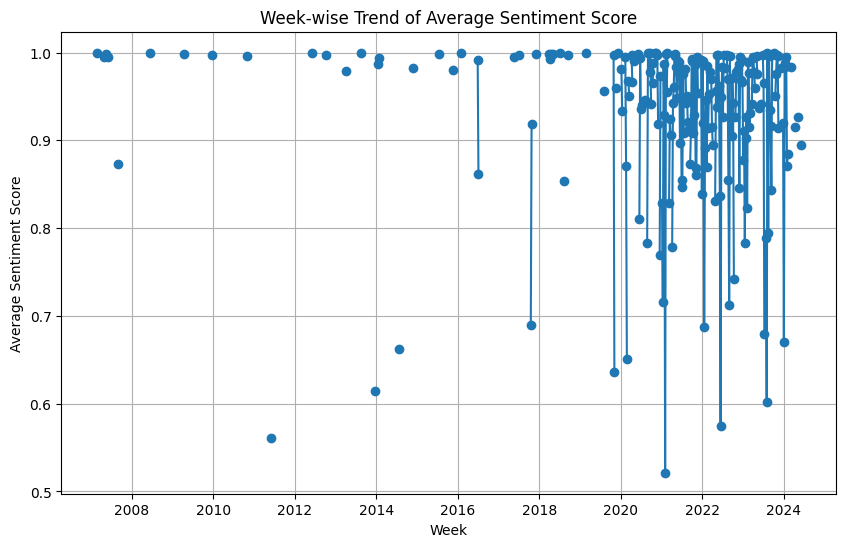

In [ ]:
import matplotlib.pyplot as plt

# Convert date column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])


# Group by week and calculate average sentiment score
weekly_sentiment = combined_df.resample('W-Mon', on='Date')['Sentiment_Score'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
plt.plot(weekly_sentiment, marker='o', linestyle='-')  # Line plot with markers
plt.title('Week-wise Trend of Average Sentiment Score')  # Add title
plt.xlabel('Week')  # Label x-axis
plt.ylabel('Average Sentiment Score')  # Label y-axis
plt.grid(True)  # Add gridlines
plt.show()


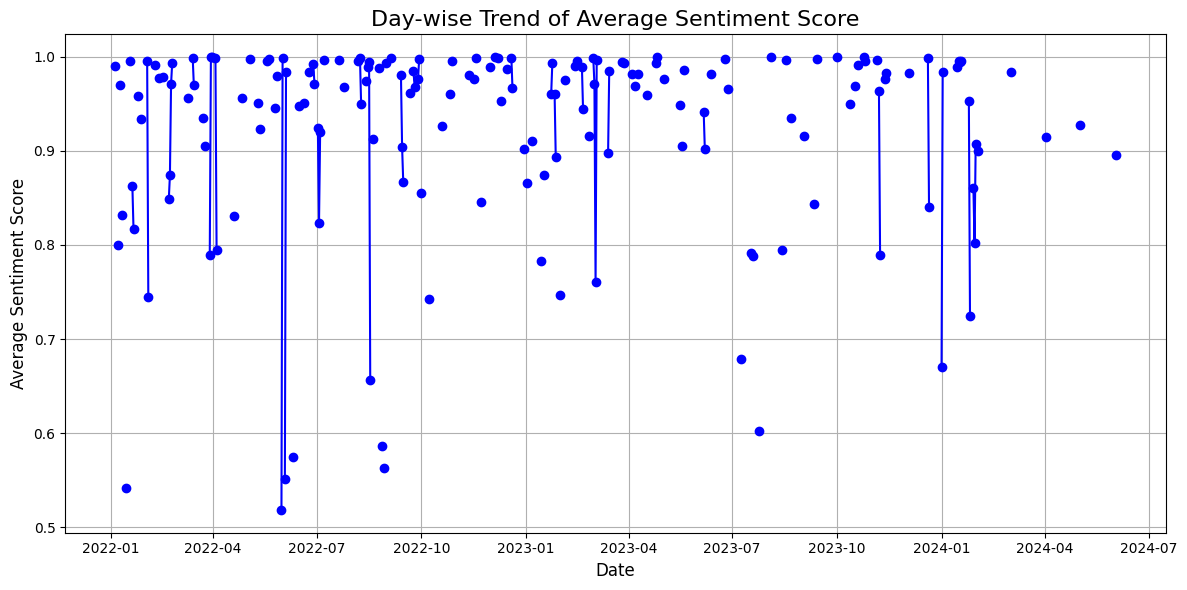

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' contains your DataFrame with columns 'Date' and 'Sentiment_Score'

# Convert date column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Specify the start date
start_date = '2022-01-01'

# Group by day starting from the specified start date and calculate average sentiment score
# Group by week starting from the specified start date and calculate average sentiment score
weekly_sentiment = combined_df[combined_df['Date'] >= start_date].resample('D', on='Date')['Sentiment_Score'].mean()

# Plot the graph with improved appearance
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.plot(weekly_sentiment, color='b', marker='o', linestyle='-')  # Add markers and linestyle
plt.title('Day-wise Trend of Average Sentiment Score', fontsize=16)  # Update the title
plt.xlabel('Date', fontsize=12)  # Update the x-axis label
plt.ylabel('Average Sentiment Score', fontsize=12)  # Update the y-axis label
plt.xticks(fontsize=10)  # Increase the font size of x-axis tick labels
plt.yticks(fontsize=10)  # Increase the font size of y-axis tick labels
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


4. . Word cloud map with organization name identified in the News headline


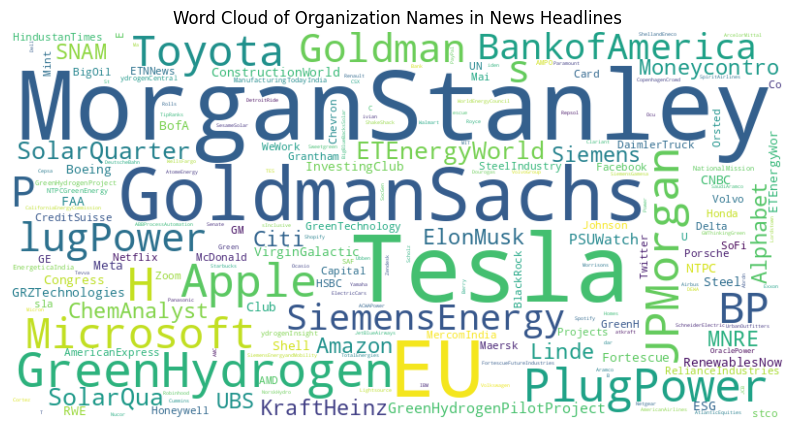

In [ ]:
from wordcloud import WordCloud

# Combine all organization names into a single string
all_organizations = ' '.join(combined_df['Organizations'].explode().dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_organizations)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Organization Names in News Headlines')
plt.axis('off')
plt.show()
